### __Principle Componenet Analysis__

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import time

Students performance in Maths

In [2]:
student_data = pd.read_csv('student-mat.csv')
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [3]:
col_str = student_data.columns[student_data.dtypes == object]
col_str

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

* convert each catagory value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benifit of not weighting a value improperly. simplest method is using pandas .get_dummies() method
* drop_frist = True reduces the extra column creation


In [4]:
student_data = pd.get_dummies(student_data,columns=col_str,drop_first=True)
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_MS          395 non-null    bool 
 17  sex_M           

In [5]:
student_data[['G1','G2','G3']].corr()

,G1,G2,G3
G1,1.000000,0.852118,0.801468
G2,0.852118,1.000000,0.904868
G3,0.801468,0.904868,1.000000


since, G1,G2,G3 have very high corelation so we can frop G1 and G2

In [6]:
student_data.drop(axis=1,labels=['G1','G2'])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,False,True,False,True,True,False,True,True,False,False
391,17,3,1,2,1,0,2,4,5,3,...,True,False,False,False,False,False,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,...,False,True,False,False,False,False,False,True,False,False
393,18,3,2,3,1,0,4,4,1,3,...,True,False,False,False,False,False,False,True,True,False


* drop the G3 because , now we want to predict it

In [7]:
lable = student_data['G3'].values
predictors = student_data.drop(axis=1,labels=['G3']).values
student_data.shape

(395, 42)

* using leniar regression to predict grades

In [8]:
lr = linear_model.LinearRegression()


* cross_val_score : used during th testing and validation phase of your ML model devolopment
* trains and test a model over multiple folds of your dataset. this cross validation methode gives you a better understanding of model performance over the whole dataset instabe do just a single train/split,
* the number of fold is defined ,by default this is 5 
* the dataset is split up according to this folds, wher eavh fold has uniquwe set of testing data.
*  A modelis trained and tested for each fold 
* each fold return a matric for it's test data
* the mean and STD of this metrics can be calculated to provide a single matric for the process

* returns an array of scores of the estimetors for each run of cross validation

In [9]:
lr_score = cross_val_score(lr,predictors,lable,cv=5)
print('LR Model cross validation score :' + str(lr_score))

LR Model cross validation score :[0.80082431 0.88326262 0.76802125 0.77353576 0.69558864]


* Avrage of all those means()

In [10]:
print('LR Model cross validation mean score :' + str(lr_score.mean()))

LR Model cross validation mean score :0.7842465150674716


* using PCA

In [11]:
pca = PCA(n_components=len(student_data.columns)-1)
pca.fit(predictors)
variance_ratio = pca.explained_variance_ratio_
print(pca.explained_variance_.shape)

(41,)


* now plot
* Find cumulative variance, adding one independent variable at a time

In [12]:
variance_ratio_cum_sum = np.cumsum(variance_ratio)
print(variance_ratio_cum_sum)

[0.60249881 0.82425422 0.84911983 0.86994557 0.88895871 0.90683444
 0.9184901  0.92910161 0.93702158 0.94355752 0.94942391 0.95429968
 0.95866975 0.9630082  0.96640694 0.96972293 0.97258242 0.97508701
 0.97731633 0.97952796 0.98162043 0.98358934 0.98540947 0.98693444
 0.98836369 0.98977799 0.99104426 0.99226527 0.99329196 0.99430959
 0.99522784 0.99608811 0.99682872 0.99753783 0.99813929 0.99862811
 0.99906095 0.99944395 0.99975004 0.99991243 1.        ]


* this cumulative explained variance graph hepls us to choose the number of desired principle components. if we look at the above print statment's output we will realize that 90% variation inn the data is explained by tht frist 6 principle componenets . hence , we annote 6 on the graph

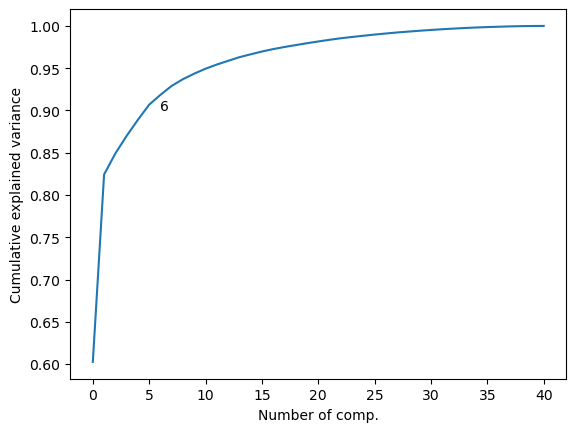

In [13]:
plt.plot(variance_ratio_cum_sum)
plt.xlabel('Number of comp.')
plt.ylabel('Cumulative explained variance')
plt.annotate('6',xy=(6,0.90))
plt.show()

* annotation 90% variance, explained by the frist 6variables only

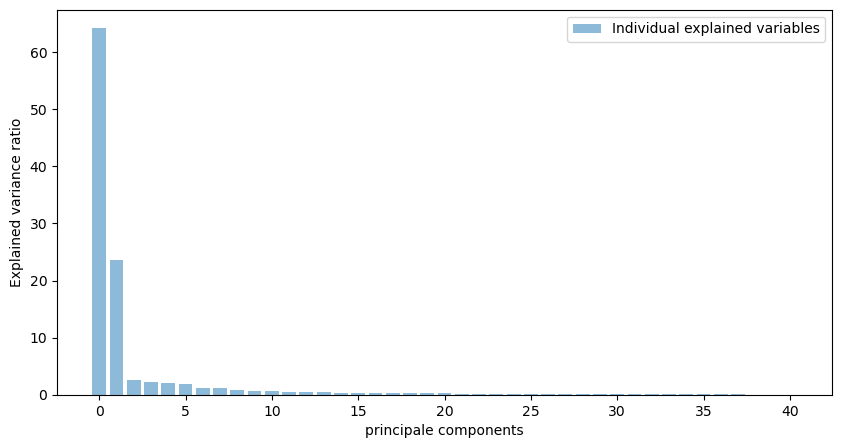

In [14]:
plt.figure(figsize=(10,5))
plt.bar(range(41),pca.explained_variance_,alpha = 0.5,label = 'Individual explained variables')
plt.ylabel('Explained variance ratio')
plt.xlabel('principale components')
plt.legend(loc = 'best')
plt.show()

* PCA transformes a set of correleted variables into a set of linearly uncorrelated varibles called principlal components, we can check the correlation with the help of heatmap corelation matrix
* correlatipon between the variables of the orignal data
* we see a high correlation, which means duplication we can eliminate many variables

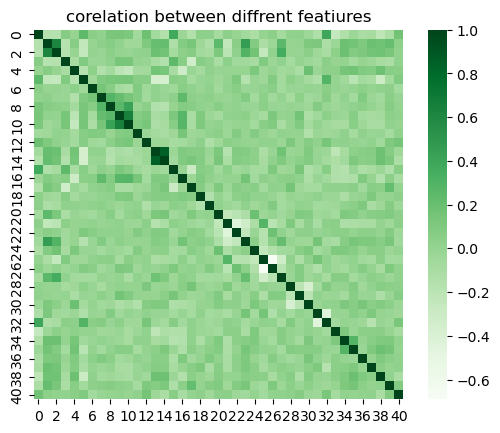

In [15]:
import seaborn as sns 
correlation = pd.DataFrame(predictors).corr()
sns.heatmap(correlation,vmax=1,square=True,cmap='Greens')
plt.title('corelation between diffrent featiures')
plt.show()


* looking at the above plot we are taking 6 variables

In [20]:
pca = PCA(n_components=6)
pca.fit(predictors)
Transformed_vector = pca.fit_transform(predictors)
print(Transformed_vector)

[[ 0.55160707  7.2305083  -1.26671855 -1.35402793 -0.57929047 -1.50629358]
 [-1.50987417  8.2744093  -1.73787295  1.23849142 -1.01028004  0.74226977]
 [ 4.38990076  4.6585758  -0.34248862  0.36624141 -2.08862574  1.84768947]
 ...
 [-2.48779667  3.26562797  2.63320957  4.75271984  0.3581546  -0.5144884 ]
 [-5.667013   -0.70227676  2.32050876  0.60903253  0.12242516  1.59557514]
 [-0.53044166  3.50946062  1.67073111  1.94837153 -0.70986028  2.05029266]]


* Correlation between 6 valraible after transforming the after PCA is 0

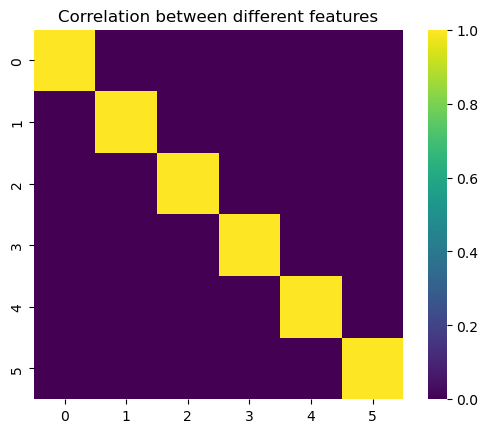

In [22]:
correlation = pd.DataFrame(Transformed_vector).corr()
sns.heatmap(correlation,vmax=1,square=True,cmap='viridis')
plt.title("Correlation between different features")
plt.show()

* Check Performance of 6 Varibles

In [24]:
lr_pca = linear_model.LinearRegression()
lr_pca_score = cross_val_score(lr_pca,Transformed_vector,lable,cv=5)
print("PCA Model Cross Validation Score : "+ str(lr_pca_score))
print("PCA Model Cross Validation Mean Score : "+ str(lr_pca_score.mean()))

PCA Model Cross Validation Score : [0.82099262 0.90037318 0.83908963 0.76730558 0.72845792]
PCA Model Cross Validation Mean Score : 0.8112437875167652


* We see value similar to earlier case when we had 40 independant variables 
* This means tha PCa has indeed reduced 40 varaiables to 6 without causing any negative impact